In [1]:
import numpy as np

In [2]:
import tensorflow as tf
import tflearn

In [3]:
%reload_ext autoreload
%autoreload 1
%aimport train
%aimport generate_data

In [4]:
tf.reset_default_graph()
model = train.build_model()

In [68]:
model.load('checkpoints/road_model1-800')

In [69]:
input_size = 128
data_size = 1

image_data, label_data = \
    generate_data.generate_batch(
        height=input_size,
        width=input_size,
        minibatch_size=data_size)

In [70]:
pr = model.predict(image_data)

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

[0.27134162187576294]


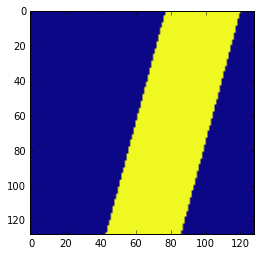

In [72]:
plt.imshow(image_data[0,:,:,0])
print(pr[0])

In [73]:
g = model.net.graph

In [74]:
[op.name for op in g.get_operations()]

['input/X',
 'Conv2D/W',
 'Conv2D/W/Initializer/random_uniform/shape',
 'Conv2D/W/Initializer/random_uniform/min',
 'Conv2D/W/Initializer/random_uniform/max',
 'Conv2D/W/Initializer/random_uniform/RandomUniform',
 'Conv2D/W/Initializer/random_uniform/sub',
 'Conv2D/W/Initializer/random_uniform/mul',
 'Conv2D/W/Initializer/random_uniform',
 'Conv2D/W/Assign',
 'Conv2D/W/read',
 'Conv2D/b',
 'Conv2D/b/Initializer/Const',
 'Conv2D/b/Assign',
 'Conv2D/b/read',
 'Conv2D/Conv2D',
 'Conv2D/BiasAdd',
 'Conv2D/Tanh',
 'FullyConnected/W',
 'FullyConnected/W/Initializer/truncated_normal/shape',
 'FullyConnected/W/Initializer/truncated_normal/mean',
 'FullyConnected/W/Initializer/truncated_normal/stddev',
 'FullyConnected/W/Initializer/truncated_normal/TruncatedNormal',
 'FullyConnected/W/Initializer/truncated_normal/mul',
 'FullyConnected/W/Initializer/truncated_normal',
 'FullyConnected/W/Assign',
 'FullyConnected/W/read',
 'FullyConnected/b',
 'FullyConnected/b/Initializer/Const',
 'FullyConnec

In [75]:
conv2_tensor = g.get_tensor_by_name('Conv2D/Tanh:0')
shape = conv2_tensor.get_shape()

fc_W_tensor = g.get_tensor_by_name('FullyConnected/W:0')
fc_W = fc_W_tensor.eval(session=model.session)
fc_W = fc_W.reshape(*shape[1:])

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt

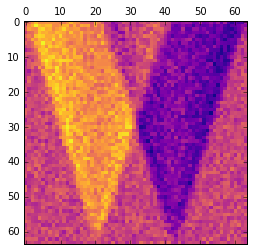

In [77]:
plt.matshow(fc_W[:,:,0])